# Data Preparation

In [1]:
# loading the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset

credit_data = pd.read_csv('credit_record.csv')
app_data = pd.read_csv('application_record.csv')

In [3]:
# merging the two datasets 

data = app_data.merge(credit_data, how='inner', on=['ID'])
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [4]:
# Drop Duplicates

data.drop_duplicates(subset='ID',inplace=True)

In [5]:
# deriving  Age and Work experience from days_birth and days_employed

data['AGE']=-(data['DAYS_BIRTH'])//365
data['WORKEXP']=-(data['DAYS_EMPLOYED'])//365


# dropping the dats_birth and days_employed
data.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis = 1,inplace=True)

# transforming status variable into numerical values

data['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
data['STATUS']=data['STATUS'].astype(int)

In [6]:
#Type casting for categorical data (object) it changes into categorical datatype . 
# for other datatypes it changes into categorical variables which  can help  optimize memory usage and improve performance .

data['CODE_GENDER'] = data['CODE_GENDER'].astype('category')
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].astype('category')
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].astype('category')
data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].astype('category')
data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].astype('category')
data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].astype('category')
data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].astype('category')
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].astype('category')
data['STATUS'] = data['STATUS'].astype('category')
data['FLAG_MOBIL'] = data['FLAG_MOBIL'].astype('category')
data['FLAG_WORK_PHONE'] = data['FLAG_WORK_PHONE'].astype('category')
data['FLAG_PHONE'] = data['FLAG_PHONE'].astype('category')
data['FLAG_EMAIL'] = data['FLAG_EMAIL'].astype('category')


In [7]:
# generating target variable from status

def get_label(status):
    if status in (3,4,5):
        return 0 
    else:
        return 1 
    
data['LABEL'] = data['STATUS'].apply(get_label)
#data['LABEL'] = data['LABEL'].astype('category')
data.drop('STATUS',axis = 1,inplace=True)
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,AGE,WORKEXP,LABEL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,0,32,12,1
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,0,32,12,1
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,58,3,1
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,52,8,1
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-22,52,8,1


In [8]:
# finding unique values of each column 

for i in data.columns :
    print(i ,"--->")
    print(data[i].unique(),"\n")

ID --->
[5008804 5008805 5008806 ... 5149838 5150049 5150337] 

CODE_GENDER --->
['M', 'F']
Categories (2, object): ['F', 'M'] 

FLAG_OWN_CAR --->
['Y', 'N']
Categories (2, object): ['N', 'Y'] 

FLAG_OWN_REALTY --->
['Y', 'N']
Categories (2, object): ['N', 'Y'] 

CNT_CHILDREN --->
[ 0  1  3  2  4  5 14 19  7] 

AMT_INCOME_TOTAL --->
[ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103

In [9]:
# to remove outlier 
data['WORKEXP']= data['WORKEXP'].replace(-1001,-1)

# Data Visualization

## univariate analysis

([<matplotlib.patches.Wedge at 0x240926771c0>,
 [Text(-0.5602563743351332, 0.9466323441636945, 'M'),
  Text(0.5602563743351331, -0.9466323441636946, 'F')],
 [Text(-0.3055943860009817, 0.5163449149983788, '67.01'),
  Text(0.30559438600098165, -0.5163449149983789, '32.99')])

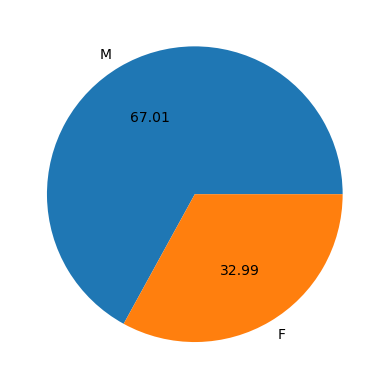

In [10]:
plt1=data['CODE_GENDER'].value_counts()
l1 = data['CODE_GENDER'].unique()
plt.pie(plt1,autopct='%.2f',labels=l1)

([<matplotlib.patches.Wedge at 0x240926d7460>,
 [Text(-0.40587642144812863, 1.022381695118052, 'Y'),
  Text(0.4058765171704095, -1.0223816571171542, 'N')],
 [Text(-0.2213871389717065, 0.5576627427916646, '62.03'),
  Text(0.22138719118385972, -0.5576627220639022, '37.97')])

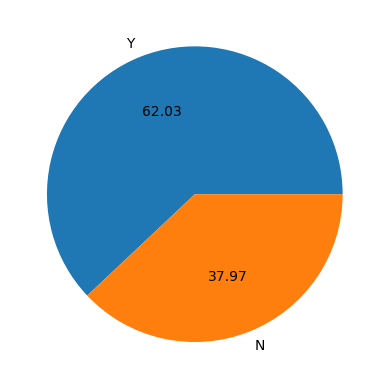

In [11]:
plt2=data['FLAG_OWN_CAR'].value_counts()
l2 = data['FLAG_OWN_CAR'].unique()
plt.pie(plt2,autopct='%.2f',labels=l2)

([<matplotlib.patches.Wedge at 0x2409272b040>,
 [Text(-0.5664439914763622, 0.9429428426582002, 'Y'),
  Text(0.5664440797610399, -0.9429427896238821, 'N')],
 [Text(-0.3089694498961975, 0.5143324596317455, '67.22'),
  Text(0.30896949805147633, -0.5143324307039356, '32.78')])

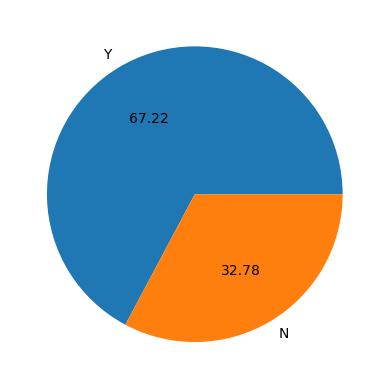

In [12]:
plt3=data['FLAG_OWN_REALTY'].value_counts()
l3 = data['FLAG_OWN_REALTY'].unique()
plt.pie(plt3,autopct='%.2f',labels=l3)

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

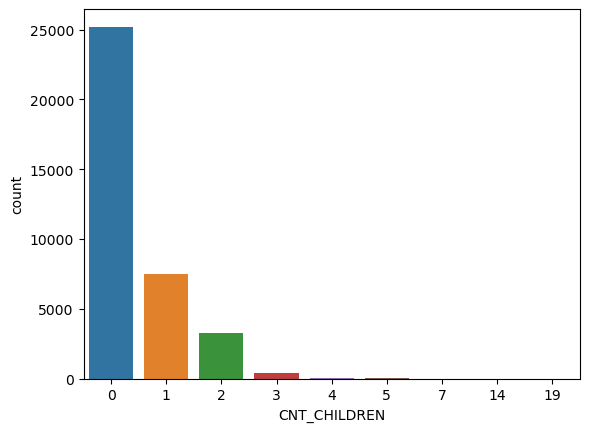

In [13]:
sns.countplot(data['CNT_CHILDREN'])

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

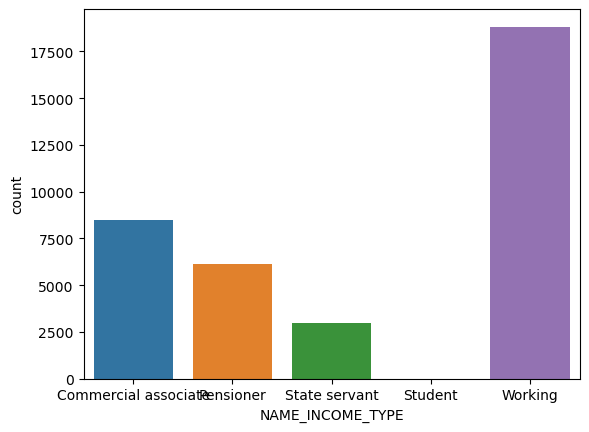

In [14]:
sns.countplot(data['NAME_INCOME_TYPE'])

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

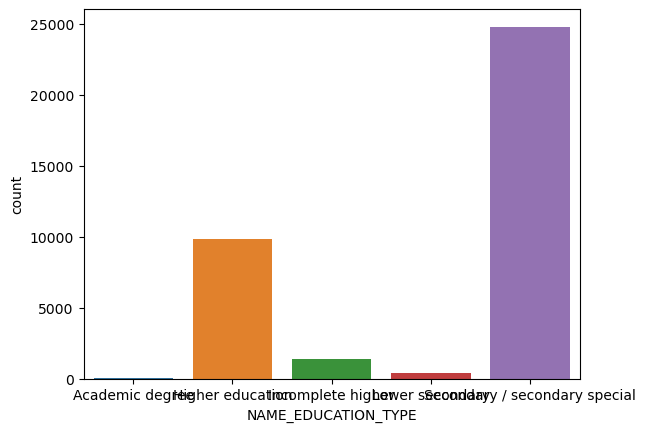

In [15]:
sns.countplot(data['NAME_EDUCATION_TYPE'])

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

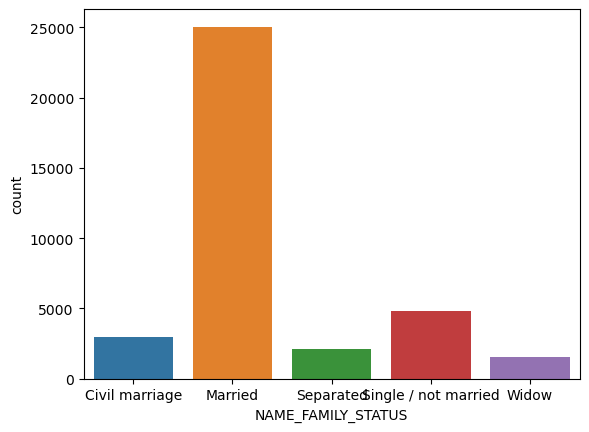

In [16]:
sns.countplot(data['NAME_FAMILY_STATUS'])

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='count'>

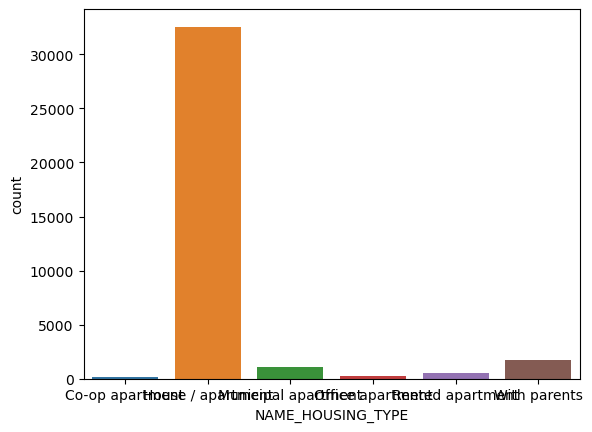

In [17]:
sns.countplot(data['NAME_HOUSING_TYPE'])

<AxesSubplot:xlabel='FLAG_MOBIL', ylabel='count'>

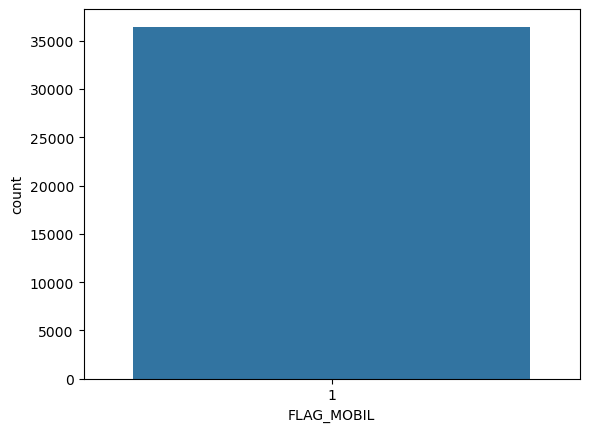

In [18]:
sns.countplot(data['FLAG_MOBIL'])

<AxesSubplot:xlabel='FLAG_WORK_PHONE', ylabel='count'>

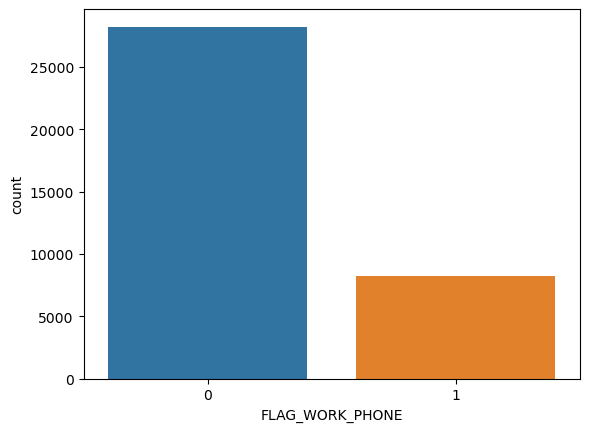

In [19]:
sns.countplot(data['FLAG_WORK_PHONE'])

<AxesSubplot:xlabel='FLAG_PHONE', ylabel='count'>

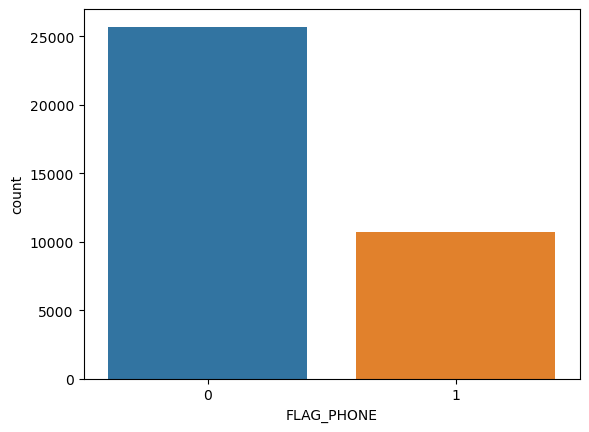

In [20]:
sns.countplot(data['FLAG_PHONE'])

<AxesSubplot:xlabel='FLAG_EMAIL', ylabel='count'>

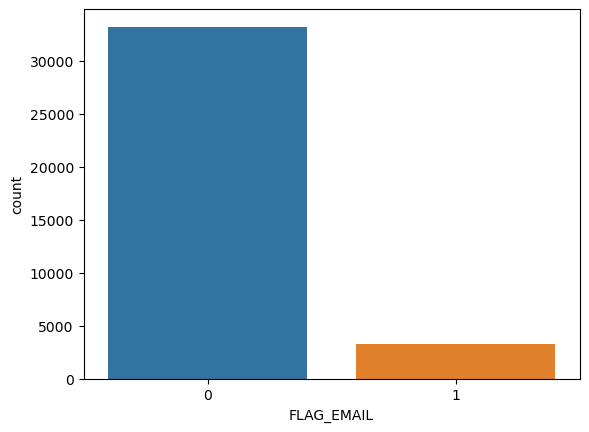

In [21]:
sns.countplot(data['FLAG_EMAIL'])

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

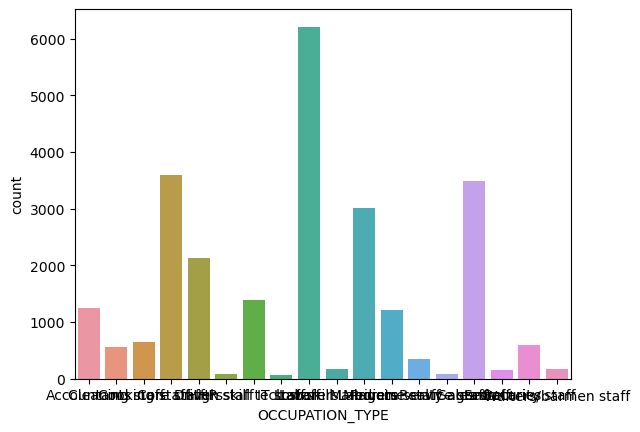

In [22]:
sns.countplot(data['OCCUPATION_TYPE'])

(array([2.645e+04, 9.527e+03, 4.550e+02, 1.900e+01, 2.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

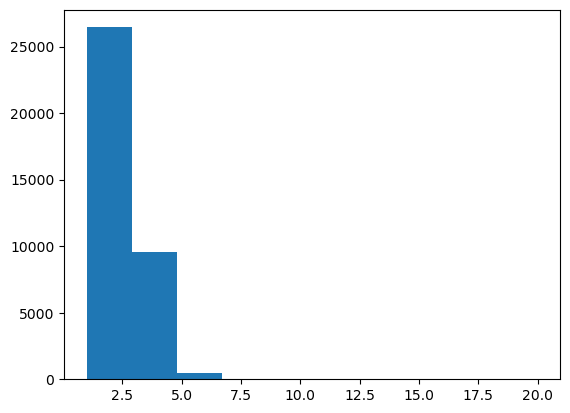

In [23]:
plt.hist(data['CNT_FAM_MEMBERS'])

([<matplotlib.patches.Wedge at 0x24093fe9730>,
 [Text(-1.0999690868212642, 0.008246698587569502, '1'),
  Text(1.099969086350757, -0.008246761344991669, '0')],
 [Text(-0.599983138266144, 0.004498199229583364, '99.76'),
  Text(0.5999831380095036, -0.004498233460904546, '0.24')])

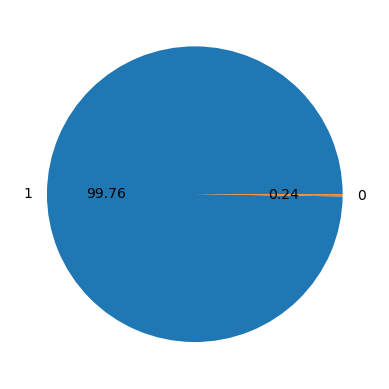

In [24]:
plt4=data['LABEL'].value_counts()
l4 = data['LABEL'].unique()
plt.pie(plt4,autopct='%.2f',labels=l4)

## bivariate analysis

In [25]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,AGE,WORKEXP,LABEL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,0,32,12,1
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,0,32,12,1
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,58,3,1
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,52,8,1
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-22,52,8,1


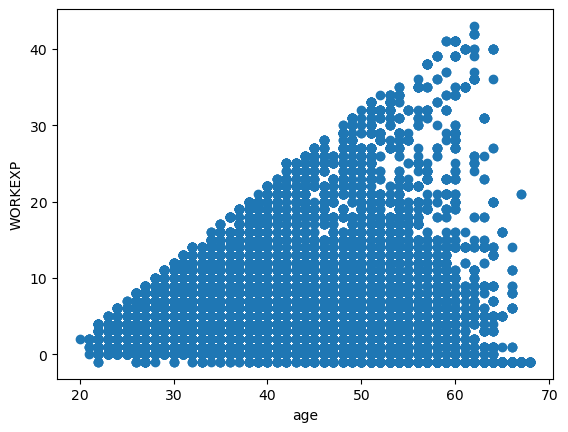

In [26]:
plt.scatter(data['AGE'],data['WORKEXP'])
plt.xlabel('age')
plt.ylabel('WORKEXP')
plt.show()

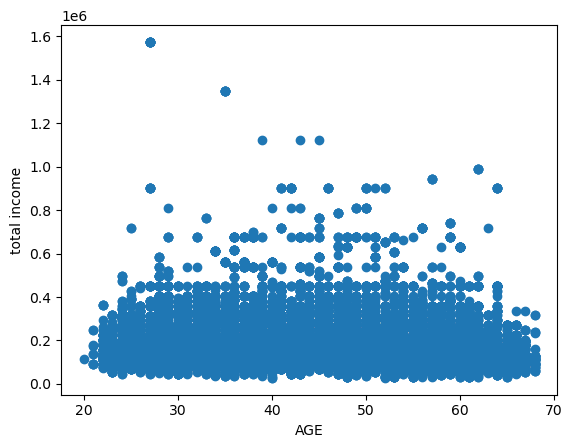

In [27]:
plt.scatter(data['AGE'],data['AMT_INCOME_TOTAL'])
plt.xlabel('AGE')
plt.ylabel('total income')
plt.show()

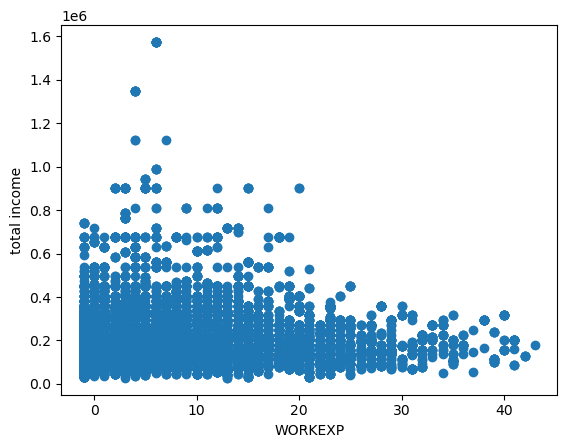

In [28]:
plt.scatter(data['WORKEXP'],data['AMT_INCOME_TOTAL'])
plt.xlabel('WORKEXP')
plt.ylabel('total income')
plt.show()

## Multivariate analysis

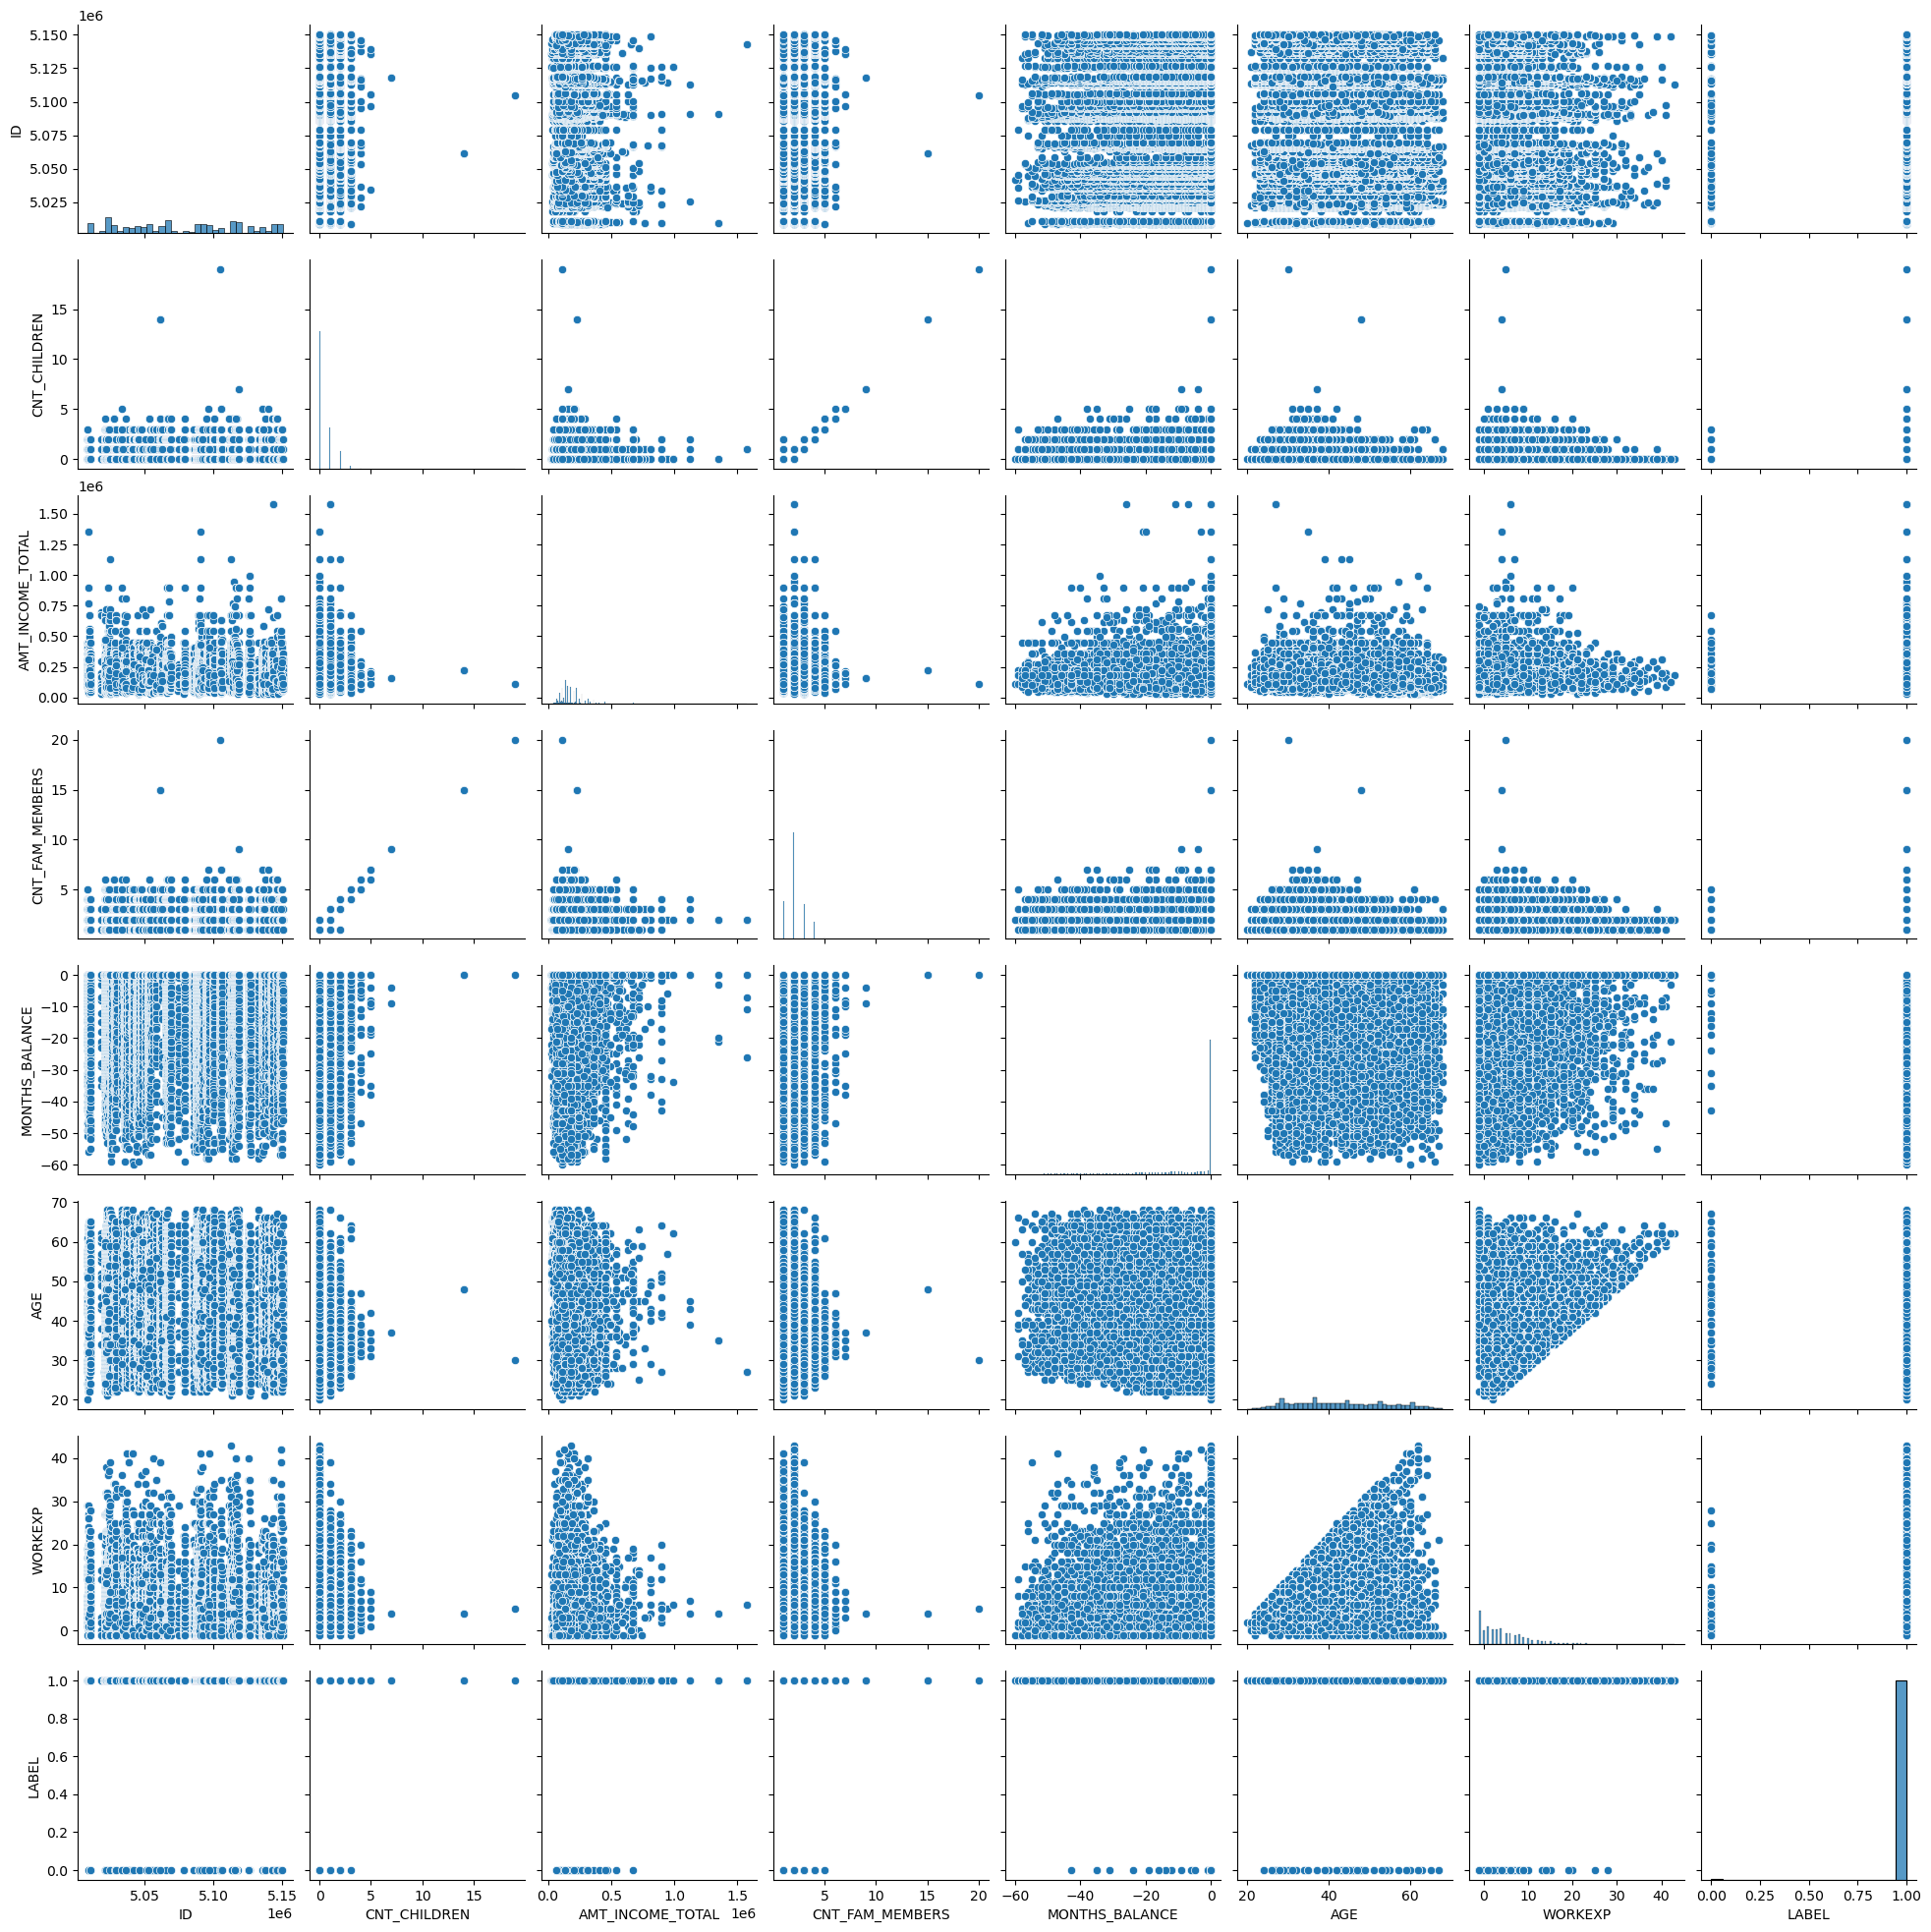

In [29]:
sns.pairplot(data)

<AxesSubplot:>

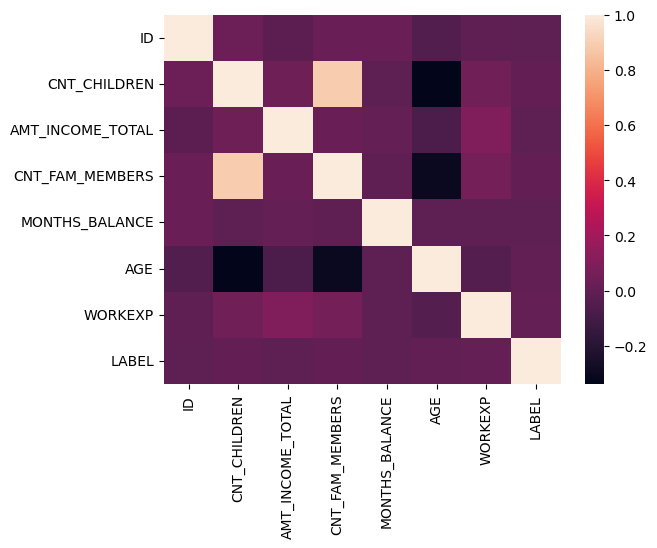

In [30]:
com=data.corr()
sns.heatmap(com)

# Descriptive Statistics

In [31]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,MONTHS_BALANCE,AGE,WORKEXP,LABEL
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,2.198453,-5.831802,43.260334,5.446279,0.997614
std,4.187524e+04,0.742367,1.017892e+05,0.911686,11.326494,11.510414,6.573271,0.048793
min,5.008804e+06,0.000000,2.700000e+04,1.000000,-60.000000,20.000000,-1.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,2.000000,-6.000000,34.000000,1.000000,1.000000
50%,5.074614e+06,0.000000,1.575000e+05,2.000000,0.000000,42.000000,4.000000,1.000000
75%,5.115396e+06,1.000000,2.250000e+05,3.000000,0.000000,53.000000,8.000000,1.000000
max,5.150487e+06,19.000000,1.575000e+06,20.000000,0.000000,68.000000,43.000000,1.000000


In [32]:
# selecting numeric columns

numeric_df = data.select_dtypes(include='number')
numeric_df.head()


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,MONTHS_BALANCE,AGE,WORKEXP,LABEL
0,5008804,0,427500.0,2.0,0,32,12,1
16,5008805,0,427500.0,2.0,0,32,12,1
31,5008806,0,112500.0,2.0,0,58,3,1
61,5008808,0,270000.0,1.0,0,52,8,1
66,5008809,0,270000.0,1.0,-22,52,8,1


In [33]:
# selecting categorical columns

categorical_df = data.select_dtypes(include=['category'])
categorical_df.head()


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN
16,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN
31,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff
61,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff
66,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff


In [34]:
# mode for categorical variables

categorical_df.mode()


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE
0,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers


# Data pre processing

In [35]:
data.shape

(36457, 20)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 777701
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   36457 non-null  int64   
 1   CODE_GENDER          36457 non-null  category
 2   FLAG_OWN_CAR         36457 non-null  category
 3   FLAG_OWN_REALTY      36457 non-null  category
 4   CNT_CHILDREN         36457 non-null  int64   
 5   AMT_INCOME_TOTAL     36457 non-null  float64 
 6   NAME_INCOME_TYPE     36457 non-null  category
 7   NAME_EDUCATION_TYPE  36457 non-null  category
 8   NAME_FAMILY_STATUS   36457 non-null  category
 9   NAME_HOUSING_TYPE    36457 non-null  category
 10  FLAG_MOBIL           36457 non-null  category
 11  FLAG_WORK_PHONE      36457 non-null  category
 12  FLAG_PHONE           36457 non-null  category
 13  FLAG_EMAIL           36457 non-null  category
 14  OCCUPATION_TYPE      25134 non-null  category
 15  CNT_FAM_MEMBERS   

In [37]:
# checking for null values

data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
AGE                        0
WORKEXP                    0
LABEL                      0
dtype: int64

In [38]:
# data cleaning

data.drop(['OCCUPATION_TYPE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','FLAG_MOBIL','ID'],inplace=True,axis = 1)

In [39]:
# one hot encoding

encoded_data = pd.get_dummies(data,columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE',
                                            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])
encoded_data.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,MONTHS_BALANCE,AGE,WORKEXP,LABEL,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,427500.0,2.0,0,32,12,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
16,0,427500.0,2.0,0,32,12,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
31,0,112500.0,2.0,0,58,3,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
61,0,270000.0,1.0,0,52,8,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0
66,0,270000.0,1.0,-22,52,8,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [40]:
# feature selection

encoded_data.drop(['CODE_GENDER_M','FLAG_OWN_CAR_Y','FLAG_OWN_REALTY_Y','NAME_INCOME_TYPE_Working',
                    'NAME_EDUCATION_TYPE_Secondary / secondary special','NAME_FAMILY_STATUS_Widow',
                   'NAME_HOUSING_TYPE_With parents'],
                    inplace=True,axis = 1)

In [41]:
x = encoded_data.drop(['LABEL'],axis=1)
y = encoded_data['LABEL']

<AxesSubplot:xlabel='LABEL', ylabel='count'>

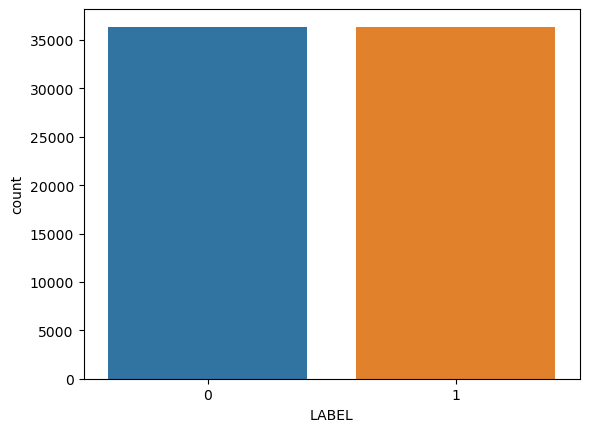

In [42]:
# Handling imbalanced dataset

from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)
x_res,y_res = smote.fit_resample(x,y)
sns.countplot(y_res)

In [43]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.3,random_state=42)
x_train.isna().sum()

CNT_CHILDREN                               0
AMT_INCOME_TOTAL                           0
CNT_FAM_MEMBERS                            0
MONTHS_BALANCE                             0
AGE                                        0
WORKEXP                                    0
CODE_GENDER_F                              0
FLAG_OWN_CAR_N                             0
FLAG_OWN_REALTY_N                          0
NAME_INCOME_TYPE_Commercial associate      0
NAME_INCOME_TYPE_Pensioner                 0
NAME_INCOME_TYPE_State servant             0
NAME_INCOME_TYPE_Student                   0
NAME_EDUCATION_TYPE_Academic degree        0
NAME_EDUCATION_TYPE_Higher education       0
NAME_EDUCATION_TYPE_Incomplete higher      0
NAME_EDUCATION_TYPE_Lower secondary        0
NAME_FAMILY_STATUS_Civil marriage          0
NAME_FAMILY_STATUS_Married                 0
NAME_FAMILY_STATUS_Separated               0
NAME_FAMILY_STATUS_Single / not married    0
NAME_HOUSING_TYPE_Co-op apartment          0
NAME_HOUSI

In [44]:
x_train.shape, y_train.shape

((50918, 26), (50918,))

In [45]:
x_test.shape,y_test.shape

((21822, 26), (21822,))

In [46]:
# scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

# Model Training and evaluation

## Decision tree

In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree = dtree.fit(x_train, y_train)

In [49]:
d_pred = dtree.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print(accuracy_score(y_test,d_pred))
print(f1_score(y_test,d_pred))
print(recall_score(y_test,d_pred))
print(precision_score(y_test,d_pred))

0.9967005773989552
0.9966990647350082
0.9951478531538954
0.9982551198457159


In [51]:
confusion_matrix(y_test,d_pred)

array([[10880,    19],
       [   53, 10870]], dtype=int64)

## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=29,criterion='entropy',random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=29, random_state=0)

In [53]:
y_pred = rf.predict(x_test)

In [54]:

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9987168912107048
0.9987186527548966
0.998992950654582
0.9984445054442309


In [55]:
confusion_matrix(y_test,y_pred)

array([[10882,    17],
       [   11, 10912]], dtype=int64)

## Xgboost classifier

In [56]:
# xgboost

import xgboost as xgb
xg= xgb.XGBClassifier(n_estimators=150,random_state=0)
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [57]:
xg_pred = xg.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(accuracy_score(y_test,xg_pred))
print(f1_score(y_test,xg_pred))
print(recall_score(y_test,xg_pred))
print(precision_score(y_test,xg_pred))

0.9982586380716708
0.9982594356907294
0.997619701547194
0.998899990833257


In [59]:
confusion_matrix(y_test,xg_pred)

array([[10887,    12],
       [   26, 10897]], dtype=int64)

## Catboost classifier

In [60]:
# catboost

from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=150, 
    learning_rate=0.1, 
)

clf.fit(x_train,y_train)

0:	learn: 0.6170986	total: 175ms	remaining: 26.1s
1:	learn: 0.5696106	total: 193ms	remaining: 14.3s
2:	learn: 0.5173375	total: 210ms	remaining: 10.3s
3:	learn: 0.4839869	total: 227ms	remaining: 8.3s
4:	learn: 0.4563183	total: 245ms	remaining: 7.09s
5:	learn: 0.4277710	total: 261ms	remaining: 6.25s
6:	learn: 0.4110717	total: 274ms	remaining: 5.6s
7:	learn: 0.3901431	total: 289ms	remaining: 5.14s
8:	learn: 0.3760916	total: 303ms	remaining: 4.75s
9:	learn: 0.3613465	total: 315ms	remaining: 4.42s
10:	learn: 0.3464118	total: 326ms	remaining: 4.12s
11:	learn: 0.3328103	total: 335ms	remaining: 3.86s
12:	learn: 0.3200114	total: 343ms	remaining: 3.62s
13:	learn: 0.3078279	total: 351ms	remaining: 3.41s
14:	learn: 0.2837048	total: 360ms	remaining: 3.24s
15:	learn: 0.2726751	total: 369ms	remaining: 3.09s
16:	learn: 0.2648212	total: 377ms	remaining: 2.94s
17:	learn: 0.2574197	total: 385ms	remaining: 2.82s
18:	learn: 0.2497048	total: 394ms	remaining: 2.71s
19:	learn: 0.2419131	total: 404ms	remaining

In [61]:
cat_pred = clf.predict(x_test)

In [62]:
print(accuracy_score(y_test,cat_pred))
print(f1_score(y_test,cat_pred))
print(recall_score(y_test,cat_pred))
print(precision_score(y_test,cat_pred))

0.9947300889011089
0.9947206537207914
0.991852055296164
0.9976058931860037


In [63]:
confusion_matrix(y_test,cat_pred)

array([[10873,    26],
       [   89, 10834]], dtype=int64)

## Logistic Regression

In [64]:
# logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [65]:
lr_pred = lr.predict(x_test_scaled)

In [66]:
print(accuracy_score(y_test,lr_pred))
print(f1_score(y_test,lr_pred))
print(recall_score(y_test,lr_pred))
print(precision_score(y_test,lr_pred))

0.85620016497113
0.8590929501571621
0.875766730751625
0.8430422138010046


In [67]:
confusion_matrix(y_test,lr_pred)

array([[9118, 1781],
       [1357, 9566]], dtype=int64)

## MLP Classifier

In [68]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(random_state=1, max_iter=10).fit(x_train_scaled, y_train)

In [69]:
mlp_pred = clf2.predict(x_test_scaled)

In [70]:
print(accuracy_score(y_test,mlp_pred))
print(f1_score(y_test,mlp_pred))
print(recall_score(y_test,mlp_pred))
print(precision_score(y_test,mlp_pred))

0.969663642195949
0.9695855922080309
0.9660349720772682
0.9731624089274186


In [71]:
confusion_matrix(y_test,mlp_pred)

array([[10608,   291],
       [  371, 10552]], dtype=int64)

## adaboost classifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ada_clf = AdaBoostClassifier(n_estimators=175, random_state=0)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=175, random_state=0)

In [74]:
ada_pred = ada_clf.predict(x_test)

In [75]:
print(accuracy_score(y_test,ada_pred))
print(f1_score(y_test,ada_pred))
print(recall_score(y_test,ada_pred))
print(precision_score(y_test,ada_pred))

0.9363944643020805
0.9364701574514829
0.9365558912386707
0.9363844393592677


In [76]:
confusion_matrix(y_test,ada_pred)

array([[10204,   695],
       [  693, 10230]], dtype=int64)

# SVM

In [77]:
from sklearn.svm import SVC
linear_svc=SVC(kernel="rbf")

In [78]:
msvc=linear_svc.fit(x_train_scaled,y_train)
svc_pred = msvc.predict(x_test_scaled)

In [79]:
print(accuracy_score(y_test,svc_pred))
print(f1_score(y_test,svc_pred))
print(recall_score(y_test,svc_pred))
print(precision_score(y_test,svc_pred))

0.95889469342865
0.9580429393329903
0.9375629405840886
0.9794376434583014


# Pickle file

In [80]:
import pickle
pickle.dump(rf,open("model.pkl","wb"))

In [81]:
model= pickle.load(open("model.pkl","rb"))
encoded_data.head()
encoded_data.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'AGE', 'WORKEXP', 'LABEL', 'CODE_GENDER_F', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_REALTY_N', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment'],
      dtype='object')

In [82]:
print(model.predict([[0,90000,2,0,49,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))

[0]


In [83]:
print(model.predict([[2,67833.51568,4.888828108,0,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0]]))

[0]


In [84]:
print(model.predict([[0,112500,2,0,60,-1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0]]))

[1]
